In [1]:
#常用資料處理模組
import csv
import numpy as np
#可視化模組
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import array
import pandas as pd 
from pandas.core.frame import DataFrame
from keras.models import Model
from keras.layers import Dense, Input, Activation, Dropout
from keras.models import Sequential


In [2]:
#讀取資料
dataset1 = pd.read_csv("C:\\Users\\Yi-Chen\\python\\Link prediction\\hw2_data\\dataset3\\train.csv")
dataset1 = pd.DataFrame(dataset1)
content = pd.read_csv("C:\\Users\\Yi-Chen\\python\\Link prediction\\hw2_data\\dataset3\\content.csv", delimiter='\t', header= None)

In [3]:
dataset1

,id,to,from,label
0,E2143,612,59,1
1,E1615,843,189,1
2,E2103,677,416,1
3,E3131,797,506,0
4,E1257,175,856,0
...,...,...,...,...
2567,E684,612,293,1
2568,E371,645,446,1
2569,E892,688,163,0
2570,E1939,387,748,0


In [4]:
content

,0,1,2,3,4,5,6,7,8,9,...,1694,1695,1696,1697,1698,1699,1700,1701,1702,1703
0,345,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,752,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,672,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,509,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,500,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,867,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
873,627,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
874,399,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
875,845,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
 content[0]

0      345
1      752
2      672
3      509
4      500
      ... 
872    867
873    627
874    399
875    845
876    746
Name: 0, Length: 877, dtype: int64

In [6]:
#先處理content資料集，將content每bit分割，把每個bit變一個特徵
#因為content的Node編號是隨機，所以重新排列

In [7]:
#第一個bit欄位名稱設為id
content.rename(columns={ content.columns[0]: "id" }, inplace=True)
content

,id,1,2,3,4,5,6,7,8,9,...,1694,1695,1696,1697,1698,1699,1700,1701,1702,1703
0,345,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,752,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,672,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,509,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,500,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,867,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
873,627,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
874,399,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
875,845,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
contentArray = content.values
contentArray

array([[345,   0,   0, ...,   0,   0,   0],
       [752,   0,   0, ...,   0,   0,   0],
       [672,   0,   0, ...,   0,   0,   0],
       ...,
       [399,   0,   0, ...,   0,   0,   0],
       [845,   0,   0, ...,   0,   0,   0],
       [746,   0,   0, ...,   0,   1,   0]], dtype=int64)

In [9]:
#重新排列
contentArray_sort = contentArray[contentArray[:,0].argsort()]
contentArray_sort = pd.DataFrame(contentArray_sort)
contentArray_sort
#content有877個nodes

,0,1,2,3,4,5,6,7,8,9,...,1694,1695,1696,1697,1698,1699,1700,1701,1702,1703
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,872,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
873,873,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
874,874,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
875,875,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
#創建相鄰矩陣adjacency matrix，根據node數量建立matrix大小
def load_data1(dataset1):
    matrix =np.zeros( (2708, 2708) )
    #對應train資料有連接上則給予1，無則0
    a=0
    b=0
    for index,row in dataset1.iterrows():
        if row[3]==1:
            x = row[1]
            y = row[2]
            matrix[x,y] = 1
            matrix[y,x] = 1 #因為是NO DIRECTION!
            a=a+1
        else:
            x = row[1]
            y = row[2]
            matrix[x,y] = 0
            matrix[y,x] = 0
            b=b+1
    print(a,b,a+b)
    return matrix


In [12]:
matrix = load_data1(dataset1)
matrix = pd.DataFrame(matrix)
matrix #matrix代表和其他nodes相連狀況

1273 1299 2572


,0,1,2,3,4,5,6,7,8,9,...,2698,2699,2700,2701,2702,2703,2704,2705,2706,2707
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#再將content & adjacency matrix 合併成為最後想測試的資料特徵=>把每個人的特徵和label的標籤做合併
contentfinal = pd.concat([contentArray_sort,matrix],axis=1)
contentfinal = contentfinal.values
contentfinal = pd.DataFrame(contentfinal)
contentfinal

,0,1,2,3,4,5,6,7,8,9,...,4402,4403,4404,4405,4406,4407,4408,4409,4410,4411
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#將對應特徵匯入train data裡面
#造to矩陣
def load_data_to(dataset1):
    data = []
    for index, row in dataset1.iterrows():
        x = row[1]
        data.append(contentfinal.iloc[x,1:])
    return data

df_to = load_data_to(dataset1)
df_to = pd.DataFrame(df_to)
df_to = df_to.values
df_to = pd.DataFrame(df_to)

#造from矩陣
def load_data_from(dataset1):
    data = []
    for index, row in dataset1.iterrows():
        x = row[2]
        data.append(contentfinal.iloc[x,1:])
    return data

df_from = load_data_from(dataset1)
df_from = pd.DataFrame(df_from)
df_from = df_from.values
df_from = pd.DataFrame(df_from)

#將兩矩陣合併成測試資料
df = pd.concat([df_to,df_from],axis=1)
df = df.values
df = pd.DataFrame(df)
df

,0,1,2,3,4,5,6,7,8,9,...,8812,8813,8814,8815,8816,8817,8818,8819,8820,8821
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#定義特徵欄位以及label欄位
data = df.iloc[:,:].values
data = pd.DataFrame(data)
data1=df
print('特徵欄位')
print(data)
print(df)
label = dataset1.loc[:,'label'].values
label = pd.DataFrame(label)
print('label')
label

特徵欄位
      0     1     2     3     4     5     6     7     8     9     ...  8812  \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
2567   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2568   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2569   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2570   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2571   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

      8813  8814  8815  8816  8817  8818  8819

,0
0,1
1,1
2,1
3,0
4,0
...,...
2567,1
2568,1
2569,0
2570,0


In [18]:
x_train=data

In [19]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,8812,8813,8814,8815,8816,8817,8818,8819,8820,8821
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#建立autoencoder
encoding_dim = 10
# this is our input placeholder
input_img = Input(shape=(8822,))
# encoder layers
# encoded = Dense(1024, activation='relu')(input_img)
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(20, activation='relu')(encoded)
encoder_output = Dense(encoding_dim)(encoded)
# decoder layers
decoded = Dense(20, activation='relu')(encoder_output)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
# decoded = Dense(1024, activation='relu')(decoded)
decoder_output = Dense(8822)(decoded)
# decoded = Dense(20654, activation='tanh')(decoded)
# construct the autoencoder model
autoencoder = Model(inputs=input_img, outputs=decoder_output)
# construct the encoder model for plotting
# encoder = Model(inputs=input_img, outputs=encoder_output)

autoencoder.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8822)]            0         
                                                                 
 dense (Dense)               (None, 512)               4517376   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 20)                2580      
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
 dense_4 (Dense)             (None, 20)                220       
                                                                 
 dense_5 (Dense)             (None, 128)               2688  

In [21]:
# compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
# training
hidtory=autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                shuffle=True)

Epoch 1/15
11/11 [==============================] - 2s 129ms/step - loss: 0.0221
Epoch 2/15
11/11 [==============================] - 1s 112ms/step - loss: 0.0187
Epoch 3/15
11/11 [==============================] - 1s 108ms/step - loss: 0.0181
Epoch 4/15
11/11 [==============================] - 1s 106ms/step - loss: 0.0177
Epoch 5/15
11/11 [==============================] - 1s 107ms/step - loss: 0.0172
Epoch 6/15
11/11 [==============================] - 1s 111ms/step - loss: 0.0168
Epoch 7/15
11/11 [==============================] - 1s 117ms/step - loss: 0.0165
Epoch 8/15
11/11 [==============================] - 1s 116ms/step - loss: 0.0161
Epoch 9/15
11/11 [==============================] - 1s 112ms/step - loss: 0.0159
Epoch 10/15
11/11 [==============================] - 1s 107ms/step - loss: 0.0155
Epoch 11/15
11/11 [==============================] - 1s 105ms/step - loss: 0.0153
Epoch 12/15
11/11 [==============================] - 1s 119ms/step - loss: 0.0150
Epoch 13/15
11/11 [======

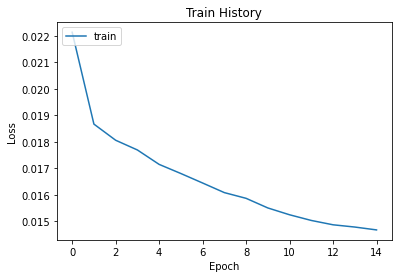

In [22]:
def show_train_history_autoencoder(train_acc):
    plt.plot(hidtory.history[train_acc])
    plt.title('Train History')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
show_train_history_autoencoder('loss')

In [24]:
auto_x_train=data

In [25]:
auto_x_train

,0,1,2,3,4,5,6,7,8,9,...,8812,8813,8814,8815,8816,8817,8818,8819,8820,8821
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#訓練普通的NN分類模型
classifier = Sequential()
#First Hidden Layer-> 輸出1024維
# classifier.add(Dense(1024, activation='relu', kernel_initializer='random_normal', input_dim=20654))
#Second  Hidden Layer
# classifier.add(Dense(512, activation='relu', kernel_initializer='random_normal'))
#Third  Hidden Layer
# classifier.add(Dense(256, activation='relu', kernel_initializer='random_normal'))
#Forth  Hidden Layer
classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal', input_dim=8822))
classifier.add(Dropout(0.3))
#Fifth  Hidden Layer
classifier.add(Dense(20, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.3))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
print(classifier.summary()) #顯示架構
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
classifier.fit(auto_x_train,label, batch_size=256, epochs=15)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                564672    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 20)                1300      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 21        
                                                                 
Total params: 565,993
Trainable params: 565,993
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
11/11 [===========================

In [31]:
#調整nn的epoch
#訓練普通的NN分類模型
classifier = Sequential()
#First Hidden Layer-> 輸出1024維
# classifier.add(Dense(1024, activation='relu', kernel_initializer='random_normal', input_dim=20654))
#Second  Hidden Layer
# classifier.add(Dense(512, activation='relu', kernel_initializer='random_normal'))
#Third  Hidden Layer
# classifier.add(Dense(256, activation='relu', kernel_initializer='random_normal'))
#Forth  Hidden Layer
classifier.add(Dense(64, activation='relu', kernel_initializer='random_normal', input_dim=8822))
classifier.add(Dropout(0.3))
#Fifth  Hidden Layer
classifier.add(Dense(20, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.3))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))
classifier.summary()  #顯示架構
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
train_history=classifier.fit(auto_x_train,label, batch_size=256, epochs=50)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                564672    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 20)                1300      
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 21        
                                                                 
Total params: 565,993
Trainable params: 565,993
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
11/11 [==============================

In [32]:
#呈現accuracy
import matplotlib.pyplot as plt
def show_train_history(train_acc):
    plt.plot(train_history.history[train_acc])
#     plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

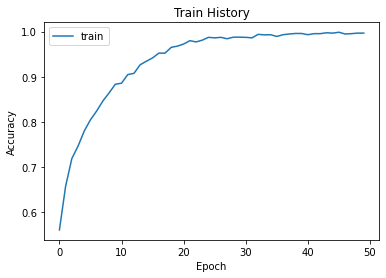

In [33]:
show_train_history('accuracy')

In [34]:
#呈現loss
def show_train_history(train_acc):
    plt.plot(train_history.history[train_acc])
#     plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

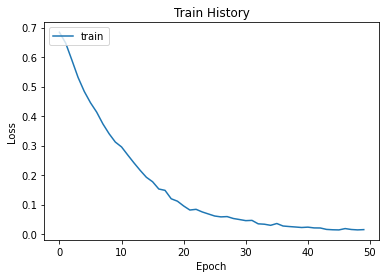

In [35]:
show_train_history('loss')

In [36]:
#匯入test data做最後測試
#test資料前處裡
test1 = pd.read_csv("C:\\Users\\Yi-Chen\\python\\Link prediction\\hw2_data\\dataset3\\test.csv")
test1.id = test1.id.str.replace('E',"")
test1


,id,to,from
0,370,26,317
1,667,196,323
2,3190,739,468
3,848,576,156
4,2161,466,199
...,...,...,...
639,492,355,30
640,3055,204,668
641,1271,625,756
642,2199,570,342


In [37]:
dd_to = load_data_to(test1)
dd_to = pd.DataFrame(dd_to)
dd_to = dd_to.values
dd_to = pd.DataFrame(dd_to)
# print('=============================')
# print(dd_to)
dd_from = load_data_from(test1)
dd_from = pd.DataFrame(dd_from)
dd_from = dd_from.values
dd_from = pd.DataFrame(dd_from)
dd = pd.concat([dd_to,dd_from],axis=1)
dd = dd.values
dd = pd.DataFrame(dd)
# dd_test = pd.concat([dd,test1],axis=1)
# print('=============================')
# print(dd_test)

In [32]:
#放入autoencoder
# prob = encoder.predict(dd)
auto_dd = autoencoder.predict(dd)
auto_dd = pd.DataFrame(auto_dd)
y_pred=classifier.predict(auto_dd)
y_pred =(y_pred>0.5)
y_pred
data_test_label = classifier.predict(auto_dd)
data_test_label = pd.DataFrame(data_test_label)
data_test_label.columns=["prob"]
test1 = pd.read_csv("C:\\Users\\Yi-Chen\\python\\Link prediction\\hw2_data\\dataset3\\test.csv")
result=pd.concat([test1,data_test_label],axis=1)
#存取測試資料
result.to_csv('C:\\Users\\Yi-Chen\\python\\Link prediction\\hw2_data\\dataset3\\result7_set3.csv')

21/21 [==============================] - 0s 4ms/step
